## Processamento WaveScatter - CAM 1
- Projeto: WaveScatter
- Henrique, Uggo, Nelson
- Data: 13/10/2019

paths_T100_010300_CAM1
17
paths_T100_020100_CAM1
10
paths_T100_020200_CAM1
4
paths_T100_020201_CAM1
9
paths_T100_020300_CAM1
6
paths_T100_030100_CAM1
27
paths_T100_030200_CAM1
15
paths_T100_030300_CAM1
11
paths_T100_040100_CAM1
15
paths_T100_040300_CAM1
18
paths_T100_050100_CAM1
18
paths_T100_050200_CAM1
21
paths_T100_050300_CAM1
5


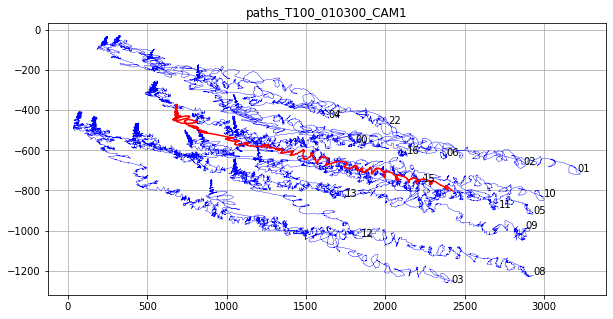

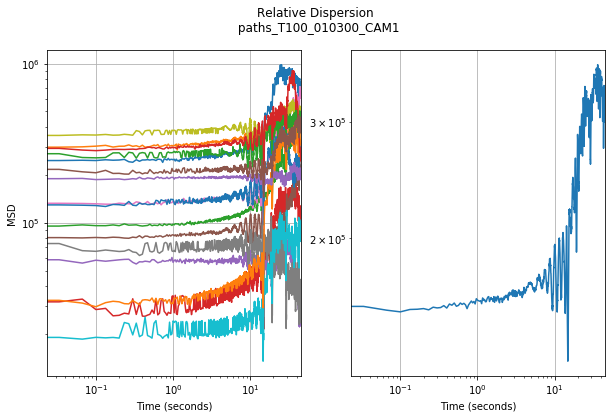

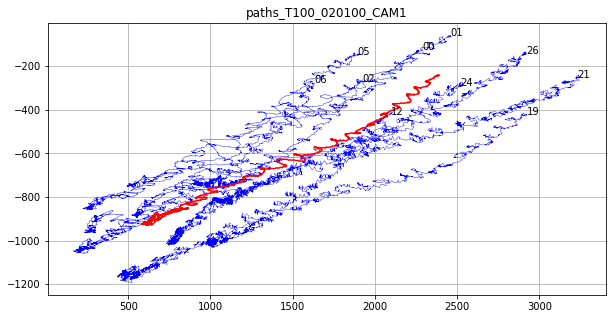

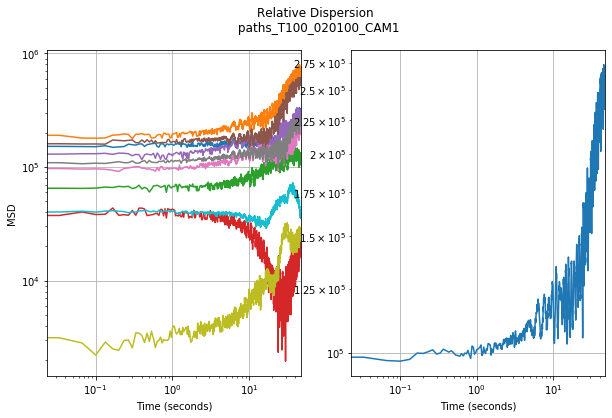

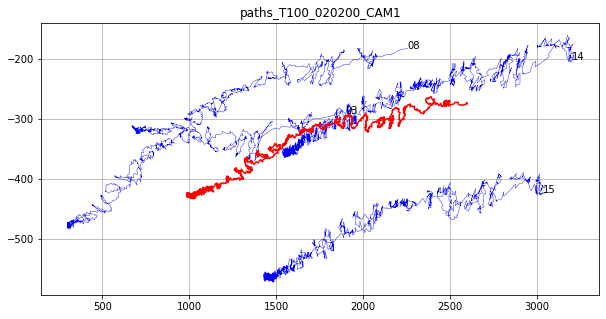

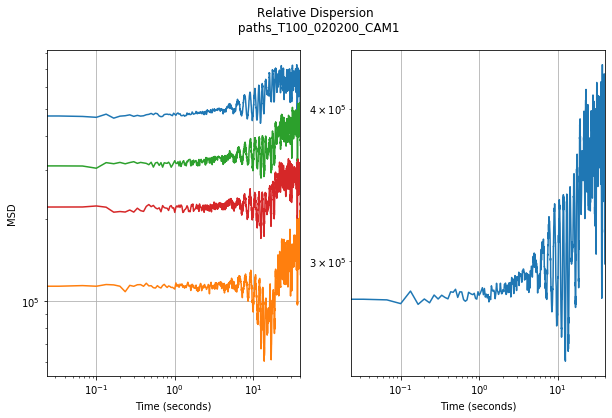

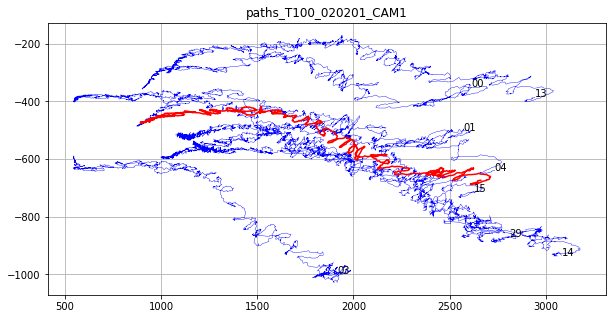

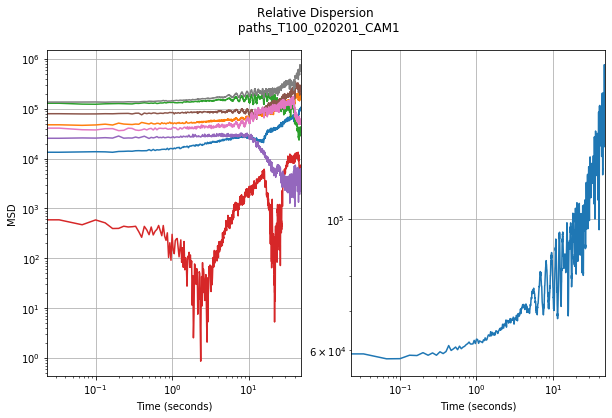

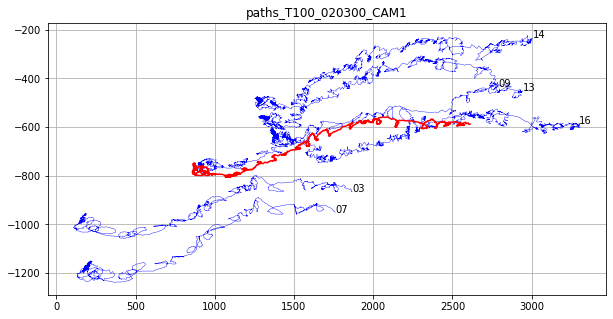

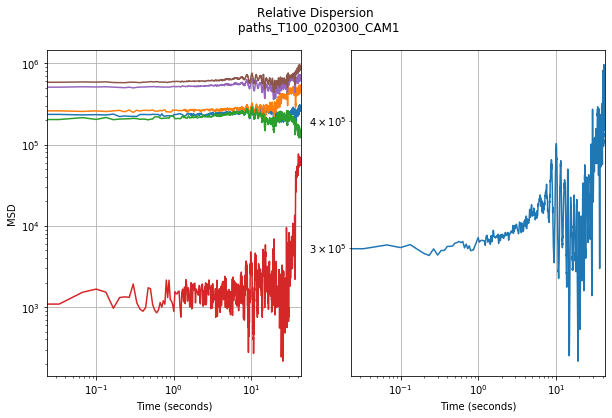

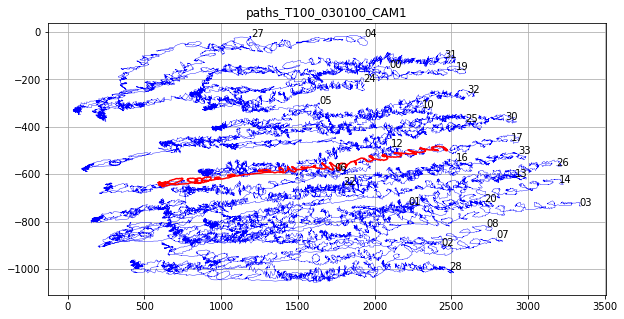

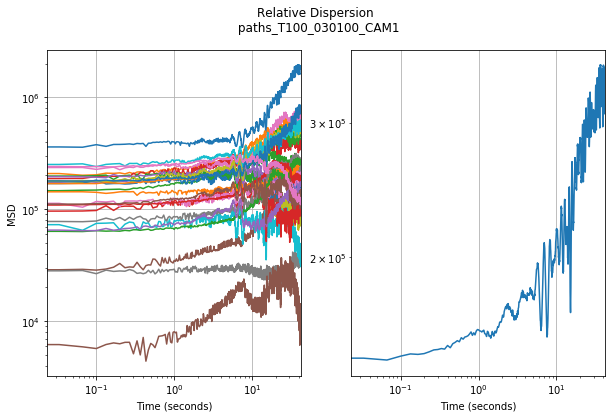

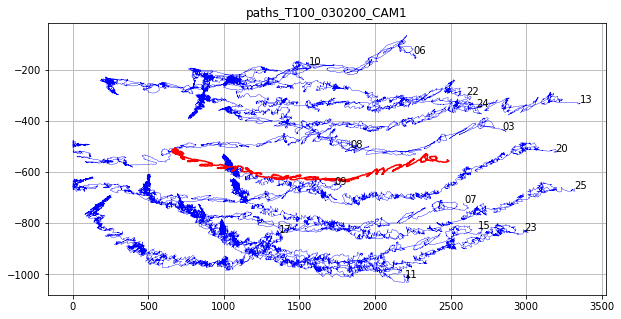

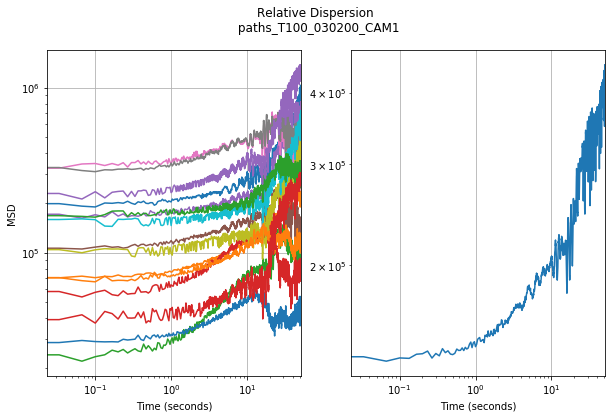

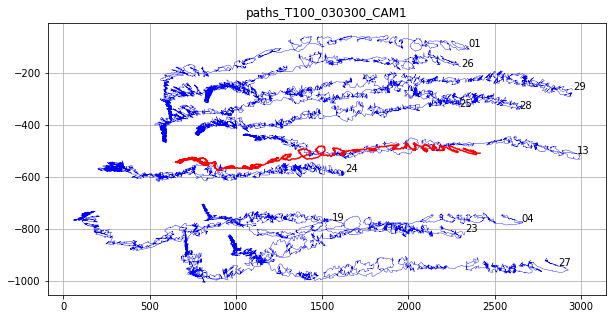

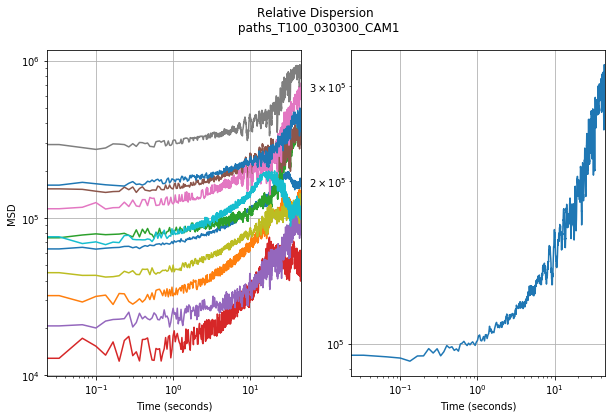

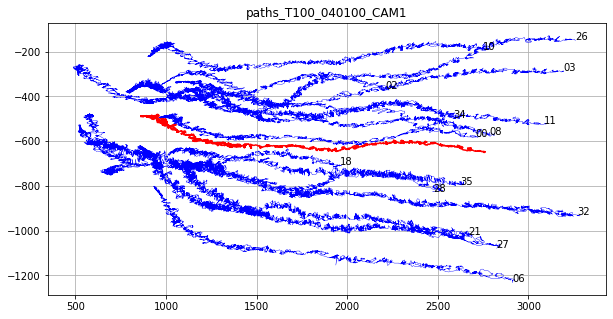

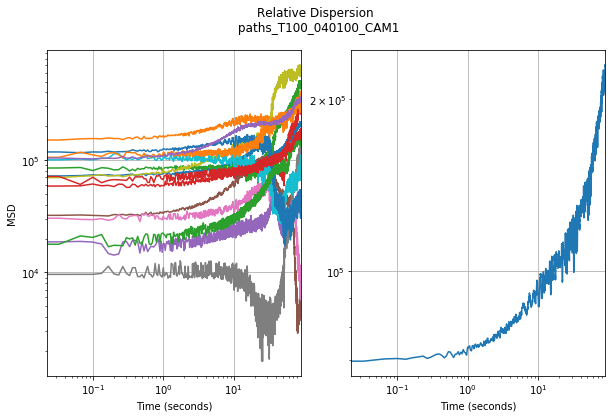

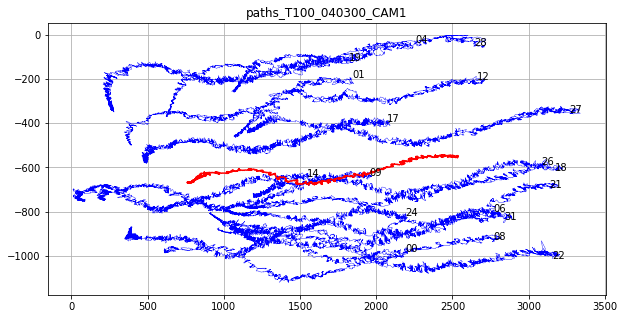

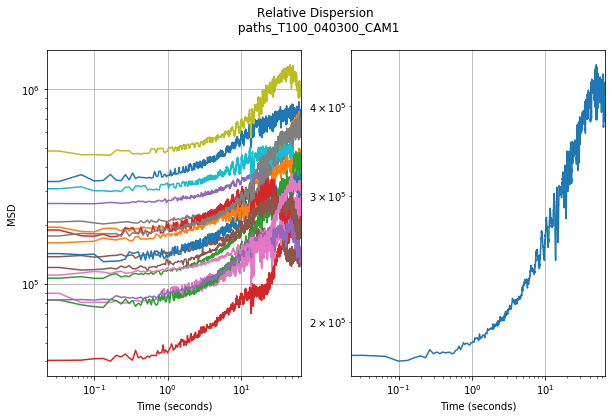

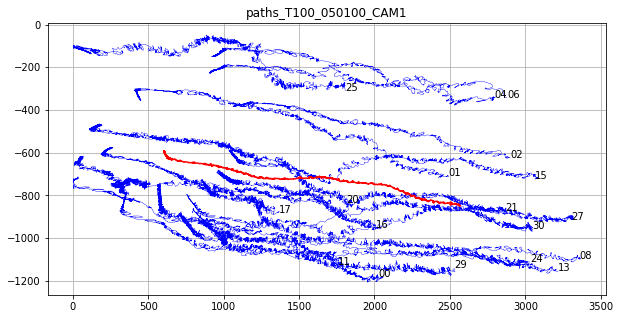

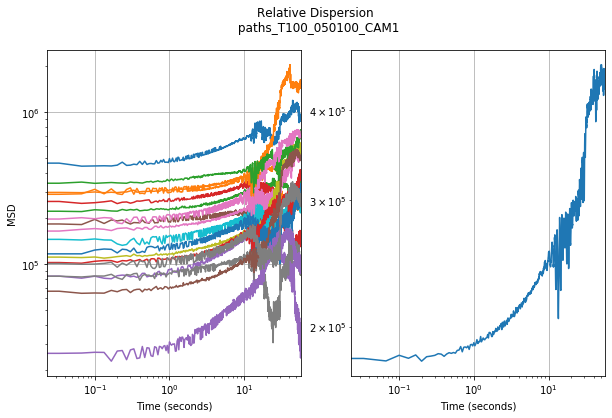

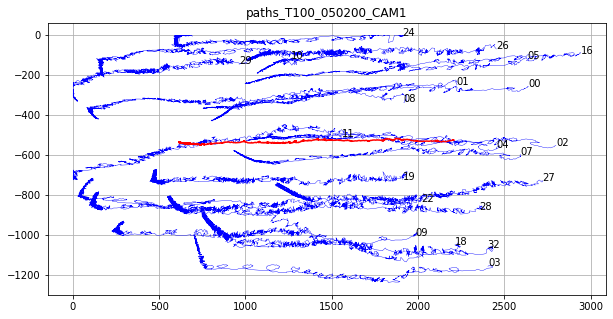

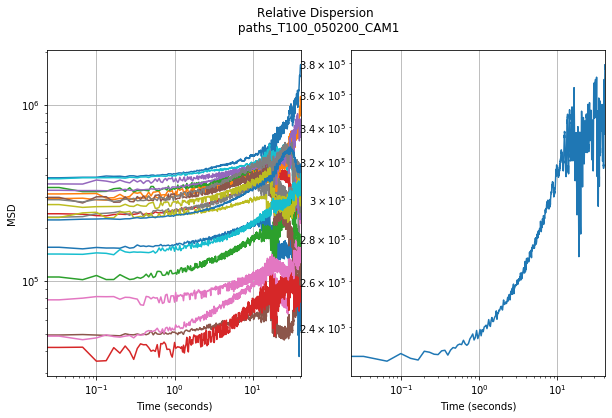

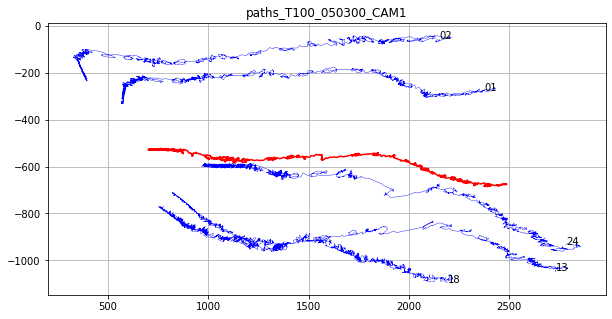

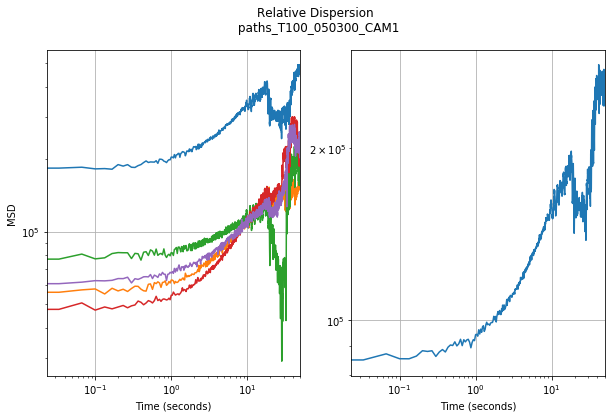

In [2]:
from importlib import reload
import proc_drifters
reload(proc_drifters)
from proc_drifters import *
import warnings
warnings.filterwarnings('ignore')


if __name__ == '__main__':

    balls_tracked = qualified_balls()

    # image scale (1px = 1.8 mm)
    # pxmm = 1.54
    pxmm = 1.8

    # frames per second
    fps = 30.0

    for experiment in list(balls_tracked.keys()):

        print (experiment)

        # path and filename
        pathname = os.environ['HOME'] + '/gdrive/coppe/lioc/wavescatter/output/CAM1/{}/'.format(experiment[6:])
        # pathname_fig = os.environ['HOME'] + '/Documents/wavescatter/figs/{}/'.format(experiment[6:])
        pathname_out = os.environ['HOME'] + '/gdrive/coppe/lioc/wavescatter/output/mean_rel_disp_cam1/'
        filename = '{}.pkl'.format(experiment)

        # get values from a dict keys
        # balls_tracked = balls_tracked_keys[experiment]
        # print (len(balls_tracked))
        # numframes = numframes_keys[filename]

        # read pickle with xy position
        xy = pd.read_pickle(pathname + filename)

        # xy = xy[numframes[experiment][0]:numframes[experiment][1]]

        # list with balls
        # balls = list(xy.keys())

        # run all balls
        if balls_tracked[experiment] == []:
            balls_qc = list(xy.keys())
        # run specific balls
        else:
            balls_qc = balls_tracked[experiment]

        print (len(balls_qc))

        # variables create inside a function
        paths_xy = {}
        # dists_xy = {}
        # dists_xy_t0 = {}
        # vels_xy = {}
        # dists_x = {}
        # dists_x_t0 = {}
        # vels_x = {}
        # dists_y = {}
        # dists_y_t0 = {}
        # vels_y = {}

        # create paths xy for each ball
        for ball in balls_qc:
            paths_xy[ball] = calculate_paths_xy(xy, ball, pxmm)
            # print ('Bola: ' + ball)
            # print ('Numero de amostragens em cada bola: {}'.format(paths_xy[ball].shape))

        # calculate path for each ball (loop for each ball)
        # for ball in balls:
        #     if ball in balls_tracked:
        #         # print ('{}..Processed'.format(ball))
        #         paths_xy[ball], dists_xy[ball], dists_xy_t0[ball], vels_xy[ball], \
        #         dists_x[ball], dists_x_t0[ball], vels_x[ball], \
        #         dists_y[ball], dists_y_t0[ball], vels_y[ball] = calculate_paths_dists_vels(xy, ball, pxmm, fps)
        #     else:
        #         # print ('{}..Error'.format(ball))
        #         pass

        # # create dataframes with times as index
        # dists_xy = pd.DataFrame(dists_xy)
        # dists_x = pd.DataFrame(dists_x)
        # dists_y = pd.DataFrame(dists_y)

        # dists_xy_t0 = pd.DataFrame(dists_xy_t0)
        # dists_x_t0 = pd.DataFrame(dists_x_t0)
        # dists_y_t0 = pd.DataFrame(dists_y_t0)

        # vels_xy = pd.DataFrame(vels_xy)
        # vels_x = pd.DataFrame(vels_x)
        # vels_y = pd.DataFrame(vels_y)

        # dists_xy.index = dists_xy.index / fps
        # dists_xy_t0.index = dists_xy_t0.index / fps
        # vels_xy.index = vels_xy.index / fps
        # dists_x.index = dists_x.index / fps
        # dists_x_t0.index = dists_x_t0.index / fps
        # vels_x.index = vels_x.index / fps
        # dists_y.index = dists_y.index / fps
        # dists_y_t0.index = dists_y_t0.index / fps
        # vels_y.index = vels_y.index / fps

        # time vector
        # times = np.array(dists_x.index)

        # calculate mean path
        mean_path_xy = calculate_mean_path_xy(paths_xy, fps)

        # calculate relative dispersion for each ball and mean
        rel_disp, mean_rel_disp = calculate_relative_dispersion(paths_xy, mean_path_xy)

        # D(t)
        # adjust fit for mean relative dispersion
        # a, b = adjust_keys[filename]
        # xdata = mean_rel_disp[a:b].index.values
        # ydata = mean_rel_disp[a:b].values[:,0]
        # popt_dt, pcov, yy = adjust_fit_rel_disp(xdata, ydata)
        # print ('D(t): {:.1f}'.format(popt_dt))

        # M(t)
        # a = 0.2
        # xdata = dists_xy_t0[a:].index.values
        # ydata = dists_xy_t0[a:].mean(axis=1)
        # popt_mt, pcov, yy = adjust_fit_rel_disp(xdata, ydata)
        # print ('M(t): {:.1f}'.format(popt_mt))

        # calculate statistics from velocity time series of each ball
        # mean_vel_xy, std_vel_xy, min_vel_xy, max_vel_xy = calculate_velocity_statistics(vels_xy)
        # print ('Mean: {:.2f}, STD: {:.2f}, Min: {:.2f}, Max: {:.2f}'.format(mean_vel_xy, std_vel_xy, min_vel_xy, max_vel_xy))

        # plot_adjust_rel_disp(filename, mean_rel_disp, xdata, popt_dt)
        # plot_adjust_dist_t0(filename, dists_xy_t0.mean(axis=1), xdata, popt_mt)
        fig1 = plot_paths(experiment, paths_xy, mean_path_xy)
        # plot_distances(filename, dists_xy_t0, dists_x_t0, dists_y_t0)
        # plot_mean_distances(filename, dists_xy_t0)
        fig2 = plot_rel_disp(experiment, rel_disp, mean_rel_disp)

        # calcula velocidade media
        # dist_total = dists_xy_t0.mean(axis=1).iloc[-1]
        # time_total = dists_xy_t0.index[-1]
        # mean_vel_total = (dist_total / time_total) / 1000.0 # em metros
        # print ('Velocidade media total (m/s): {:.3f}'.format(mean_vel_total))

        # create paths_xy qualified
        # paths_xy_qc = {}
        # for ball in paths_xy.keys():
        #     paths_xy_qc[ball] = paths_xy[ball].tolist()
        # paths_xy_qc = pd.DataFrame(paths_xy_qc)

        # save paths qualified
        # paths_xy_qc.to_csv(pathname + 'paths_qc_{}.csv'.format(experiment[6:]))
        # paths_xy_qc.to_pickle(pathname + 'paths_qc_{}.pkl'.format(experiment[6:]))
        # dists_xy.to_csv('data/qc/dists{}.csv'.format(filename[-17:]))
        # dists_xy_t0.to_csv('data/dists_xy_t0{}.csv'.format(filename[-17:]))
        # vels_xy.to_csv('data/qc/vels{}.csv'.format(filename[-17:]))

        # save figures
        # fig1.savefig(pathname_fig + 'paths_{}.png'.format(experiment[6:]))
        # fig2.savefig(pathname_fig + 'reldisp_{}.png'.format(experiment[6:]))

        # save mean relative dispersion
        mean_rel_disp.to_csv('{}mean_rel_disp_{}.csv'.format(pathname_out, experiment), index_label='time', header=['mean_rel_disp'])

    plt.show()
    # plt.close('all')
